# **Mount Google Drive**
## Dataset is in the Google Drive

In [28]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


![Descriptive Alt Text](https://drive.google.com/uc?export=view&id=1coqcTmC_sRGElv32qu1hdqkPj9krsOAN)


# **Import Libraries**

In [1]:
# import Libraries
import numpy as np
import pandas as pd


# **Load Dataset from Google Drive**

In [53]:
dataset = pd.read_csv("https://drive.google.com/uc?export=download&id=1iQESl2HwLTz25WW6Laj7J_jkGncvEkqh")
df= dataset
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## Check for duplicate id

In [71]:
print(df['id'].is_unique)  # Should be True


True


 ## Fill reviews_per_month
 Set to 0 where there are no reviews:

In [72]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)


## Fill host_name & name
You can keep or drop rows with missing host names

In [73]:
df = df.dropna(subset=['host_name'])


## Filter invalid prices

In [74]:
df = df[df['price'] > 0]
df = df[df['price'] <= 1000]


## Filter minimum_nights

In [75]:
df = df[df['minimum_nights'] < 365]


In [ ]:
print(df.describe(include='all'))


                  id            name       host_id host_name  \
count   4.858400e+04           48569  4.858400e+04     48584   
unique           NaN           47599           NaN     11405   
top              NaN  Hillside Hotel           NaN   Michael   
freq             NaN              18           NaN       414   
mean    1.902508e+07             NaN  6.764101e+07       NaN   
std     1.097818e+07             NaN  7.861160e+07       NaN   
min     2.539000e+03             NaN  2.438000e+03       NaN   
25%     9.477456e+06             NaN  7.831209e+06       NaN   
50%     1.968164e+07             NaN  3.084424e+07       NaN   
75%     2.914990e+07             NaN  1.074344e+08       NaN   
max     3.648724e+07             NaN  2.743213e+08       NaN   

       neighbourhood_group neighbourhood      latitude     longitude  \
count                48584         48584  48584.000000  48584.000000   
unique                   5           221           NaN           NaN   
top            

In [55]:
df.shape

(48895, 16)

# **Get Categorical Columns**

In [56]:
cat_cols=  df.select_dtypes(include = object) .columns
print(list(cat_cols))

['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']


# **List of Numerical Columns**


In [57]:
num_cols = df.select_dtypes(exclude=object).columns
print(list(num_cols))

['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


# **Dataset Describe**

In [58]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# **Dataset Info**

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [60]:
data= df.drop(['id','last_review'], axis=1)

# **Check data Shape**

In [61]:
data.shape

(48895, 14)

# **Check Null Values**

In [62]:
data.isnull().sum()

,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0
minimum_nights,0


# **Drop Unnecessary Columns**

In [68]:
data= df.drop(['id','last_review'], axis=1)


# **Fill Missing Values for `name`, `host_name`, and `reviews_per_month`**

In [64]:
df.fillna({'name': 'not present', 'host_name':'absent' , 'reviews_per_month':0 }, inplace= True)

# **Check Null Values**

In [69]:
data.isnull().sum()

,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0
minimum_nights,0


# **Dataset Describe**

In [27]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# **Identify Discontinued Listings**

In [28]:
discountinued_listings = data[(data['price']==0) & (data['availability_365']==0)]
discountinued_listings

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
25634,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,0.71,5,0
25753,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,0.53,2,0
26259,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,0.00,1,0


In [29]:
len(discountinued_listings)

3

# **Identify Listings with Zero Price but Available**

In [30]:
listenings_with_0_price = data[(data['price']==0) & (data['availability_365']!=0)]
print(listenings_with_0_price.shape)
listenings_with_0_price

(8, 14)


,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
23161,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,0.05,4,28
25433,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2.56,4,127
25778,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,0.15,1,73
25794,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,4.28,6,176
25795,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,4.37,6,232
25796,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,4.35,6,222
26841,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,0.11,6,333
26866,Best Coliving space ever! Shared room.,101970559,Sergii,Brooklyn,Bushwick,40.69166,-73.90928,Shared room,0,30,5,0.26,6,139


# **Remove Zero Price Listings**

In [31]:
data = data.loc[data['price'] > 0]

# **Dataset Describe after removing 0 price values**

In [32]:
data.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.888400e+04,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000
mean,6.762203e+07,40.728953,-73.952176,152.755053,7.029887,23.271991,1.090800,7.144628,112.779498
std,7.861666e+07,0.054532,0.046159,240.170260,20.512224,44.551331,1.597213,32.956185,131.627271
min,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.817310e+06,40.690100,-73.983080,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079257e+07,40.723080,-73.955685,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763120,-73.936290,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# **Dataset Info after Cleaning**

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48884 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48884 non-null  object 
 1   host_id                         48884 non-null  int64  
 2   host_name                       48884 non-null  object 
 3   neighbourhood_group             48884 non-null  object 
 4   neighbourhood                   48884 non-null  object 
 5   latitude                        48884 non-null  float64
 6   longitude                       48884 non-null  float64
 7   room_type                       48884 non-null  object 
 8   price                           48884 non-null  int64  
 9   minimum_nights                  48884 non-null  int64  
 10  number_of_reviews               48884 non-null  int64  
 11  reviews_per_month               48884 non-null  float64
 12  calculated_host_listings_count  48884

# **Correlation Heatmap**

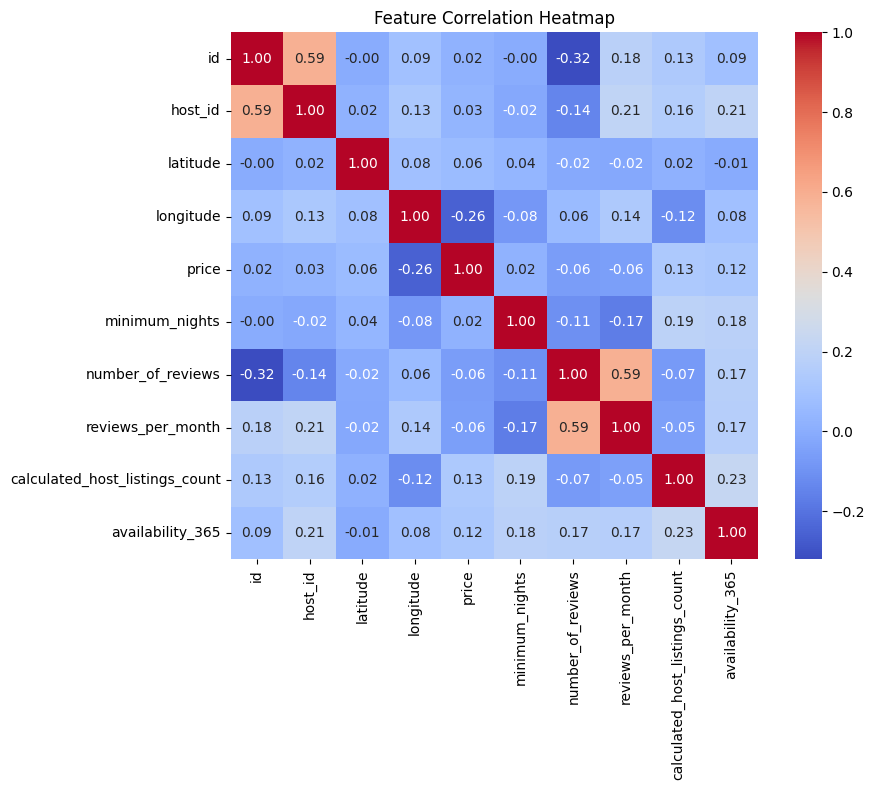

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Correlation
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()


# **Price Distribution, Room Types, and Price by Borough**


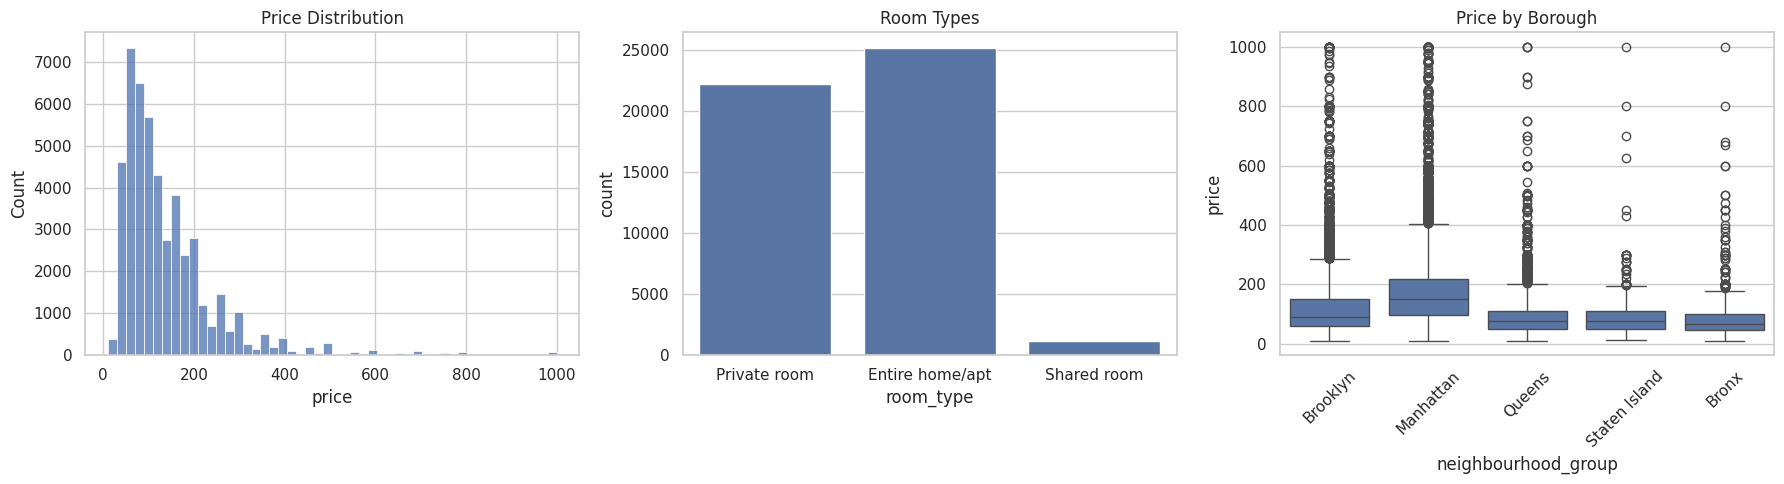

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")

# ---figure with 3 plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

#  --------Price Distribution
sns.histplot(df['price'], bins=50, ax=axes[0])
axes[0].set_title('Price Distribution')


#    --- Room Type Count
sns.countplot(x='room_type', data=df, ax=axes[1])
axes[1].set_title('Room Types')

#  --------Price by Borough
sns.boxplot(x='neighbourhood_group', y='price', data=df, ax=axes[2])
axes[2].set_title('Price by Borough')

axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# **Distribution Plots for Numerical Columns**

/tmp/ipython-input-771306175.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'])
/tmp/ipython-input-771306175.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['minimum_nights'])
/tmp/ipython-input-771306175.py:13: UserWarning: 

`distplot` is a deprecated function and wil

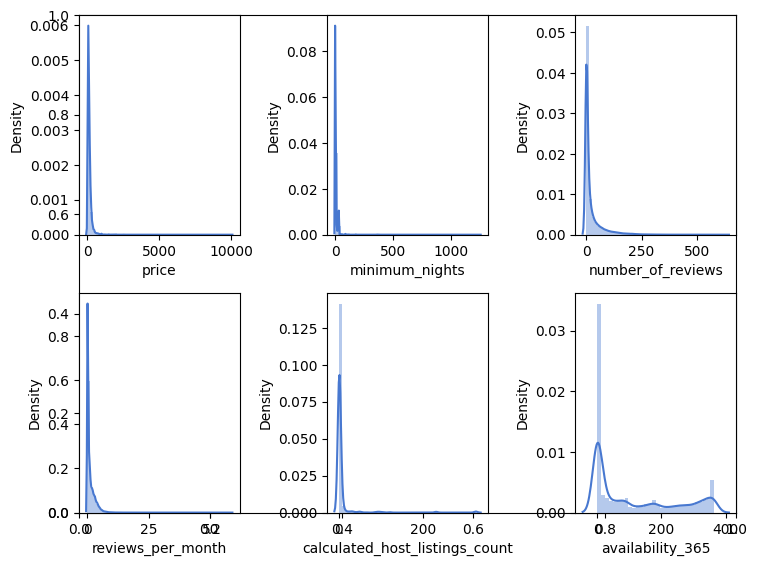

In [34]:
import seaborn as sns
sns.set_palette("muted")
from pylab import *
f ,ax = plt.subplots (figsize=(8, 6))

subplot (2,3,1)
sns.distplot(data['price'])

subplot (2,3,2)
sns.distplot(data['minimum_nights'])

subplot (2,3,3)
sns.distplot(data['number_of_reviews'])

subplot (2,3,4)
sns.distplot(data['reviews_per_month'])

subplot (2,3,5)
sns.distplot(data['calculated_host_listings_count'])

subplot (2,3,6)
sns.distplot(data['availability_365'])


plt.tight_layout()
plt.show()

# **Boxplots for Numerical Columns**

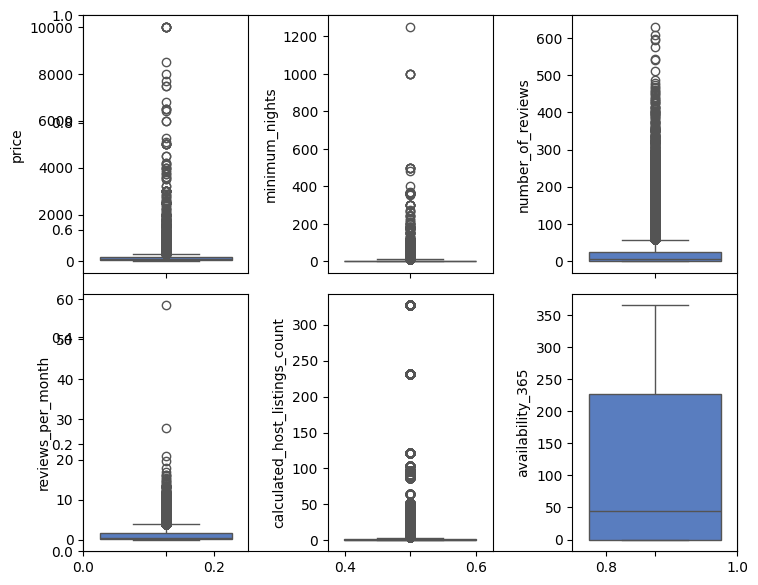

In [35]:
import seaborn as sns
sns.set_palette("muted")
from pylab import *
f ,ax = plt.subplots (figsize=(8, 6))

subplot (2,3,1)
sns.boxplot(data['price'])

subplot (2,3,2)
sns.boxplot(data['minimum_nights'])

subplot (2,3,3)
sns.boxplot(data['number_of_reviews'])

subplot (2,3,4)
sns.boxplot(data['reviews_per_month'])

subplot (2,3,5)
sns.boxplot(data['calculated_host_listings_count'])

subplot (2,3,6)
sns.boxplot(data['availability_365'])

plt.tight_layout()
plt.show()

# **Unique `neighbourhood_group` Values**

In [36]:
list (data['neighbourhood_group'].unique())

['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

# **Neighbourhood Group Value Counts**

In [37]:
data.neighbourhood_group.value_counts()

,count
neighbourhood_group,
Manhattan,21660
Brooklyn,20095
Queens,5666
Bronx,1090
Staten Island,373


# **Neighbourhood Group Bar Plot**

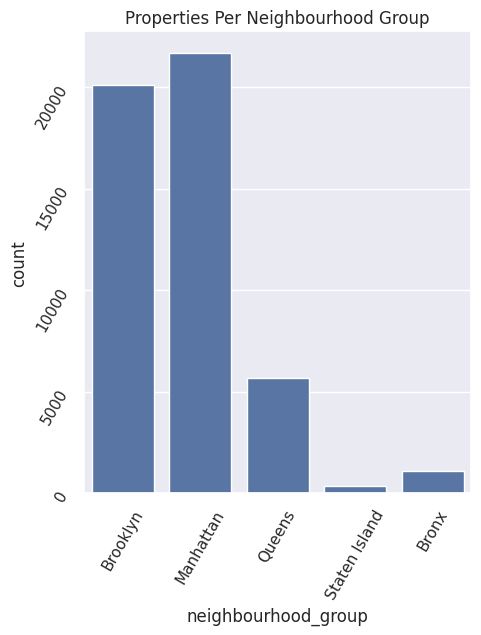

In [38]:
sns.set(rc={'figure.figsize':(5,6)})
title= 'Properties Per Neighbourhood Group'
sns.countplot(data=data, x='neighbourhood_group')
plt.title(title)
plt.xticks(rotation=60)
plt.yticks(rotation=60)
plt.show()


# **Unique `room_type` Values**


In [39]:
list(data['room_type'].unique())

['Private room', 'Entire home/apt', 'Shared room']

# **Room Type Value Counts**


In [40]:
data.room_type.value_counts()

,count
room_type,
Entire home/apt,25407
Private room,22319
Shared room,1158


# **Room Type Bar Plot**

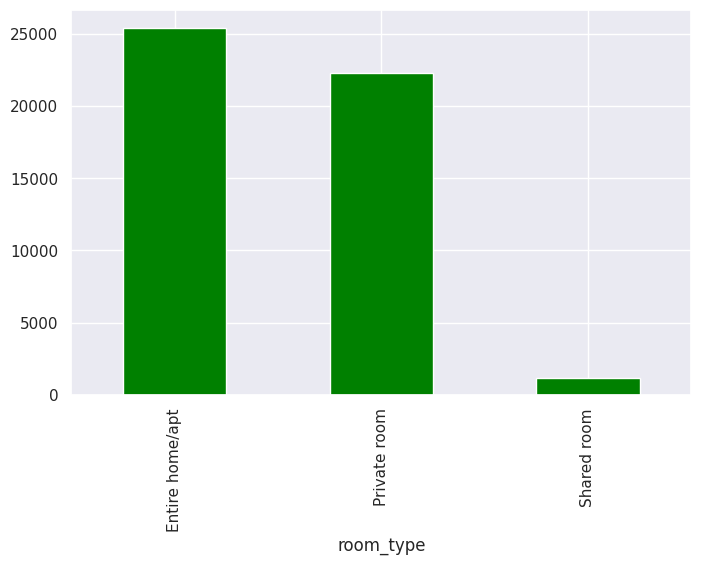

In [41]:
data['room_type'].value_counts().plot(kind='bar', color = 'green' , figsize=(8, 5))
plt.show()

# **Identify Properties Solely for Renting**

In [42]:
renting_purpose = data[(data['availability_365']== 365) & (data['room_type']=='Entire home/apt')]
print(renting_purpose.shape)
renting_purpose.head()

(485, 14)


,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
164,Charming & Cozy midtown loft any WEEK ENDS !!!,174025,Sylvia,Manhattan,Upper East Side,40.76123,-73.96420,Entire home/apt,250,3,4,0.08,1,365
181,Beautiful Queens Brownstone! - 5BR,204539,Mark,Queens,Ridgewood,40.70382,-73.89797,Entire home/apt,350,8,10,0.11,5,365
201,3 floors of luxury!,204539,Mark,Queens,Middle Village,40.71546,-73.87854,Entire home/apt,265,7,38,0.38,5,365
229,"Nice, clean, safe, convenient 3BR",204539,Mark,Queens,Ridgewood,40.70411,-73.89934,Entire home/apt,140,14,1,0.01,5,365
235,SpaHa Studio Monthly Rental,292204,Blanca,Manhattan,East Harlem,40.79163,-73.94573,Entire home/apt,125,28,183,1.83,2,365


# **Rental Properties by Neighbourhood Group**

In [43]:
renting_purpose ['neighbourhood_group'].value_counts()

,count
neighbourhood_group,
Manhattan,316
Brooklyn,117
Queens,41
Bronx,9
Staten Island,2


# **Bar Plot: Rental Properties by Neighbourhood Group**


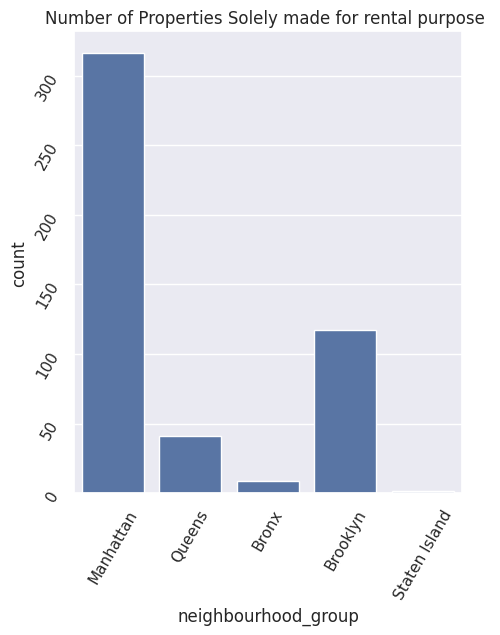

In [44]:
sns.set(rc={'figure.figsize':(5,6)})
title= 'Number of Properties Solely made for rental purpose '
sns.countplot(data=renting_purpose, x='neighbourhood_group')
plt.title(title)
plt.xlabel('neighbourhood_group')
plt.ylabel('count')
plt.xticks(rotation=60)
plt.yticks(rotation=60)
plt.show()


# **Top 5 Listings by Name**

In [45]:
listings_count_df = data['name'].value_counts()[:5].reset_index()
listings_count_df.rename(columns={'index':'Listings on Airbnb', 'name':'Total Listings'}, inplace=True)
listings_count_df

,Total Listings,count
0,Hillside Hotel,18
1,Home away from home,17
2,New york Multi-unit building,16
3,not present,16
4,Brooklyn Apartment,12


# **Bar Plot for Top 5 Listings**

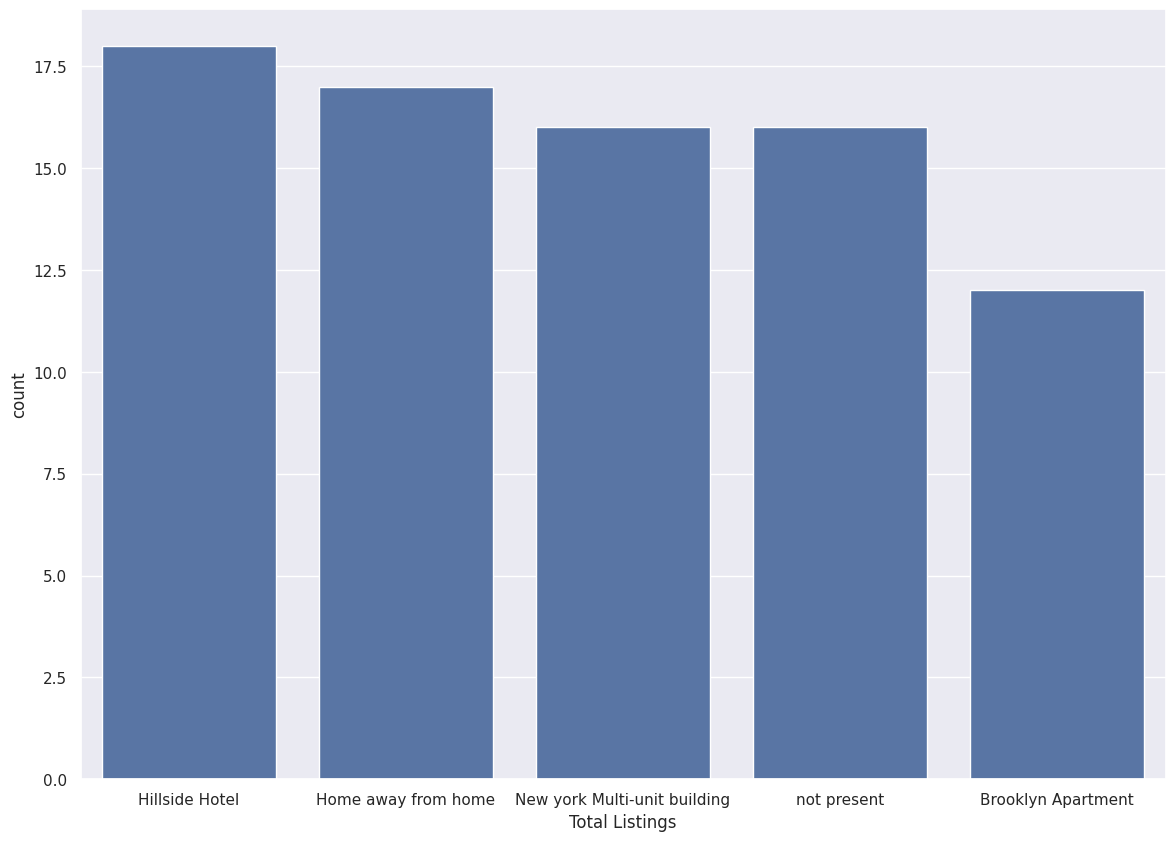

In [46]:
sns.set(rc={'figure.figsize':(14,10)})
sns.barplot(x='Total Listings', y='count', data=listings_count_df)
plt.show()

# **Top 10 Hosts**

In [47]:
top_10_hots =data['host_name'].value_counts()[:10].reset_index()
top_10_hots

,host_name,count
0,Michael,417
1,David,403
2,Sonder (NYC),327
3,John,294
4,Alex,279
5,Blueground,232
6,Sarah,227
7,Daniel,226
8,Jessica,205
9,Maria,204


# **Bar Plot for Top 10 Hosts**

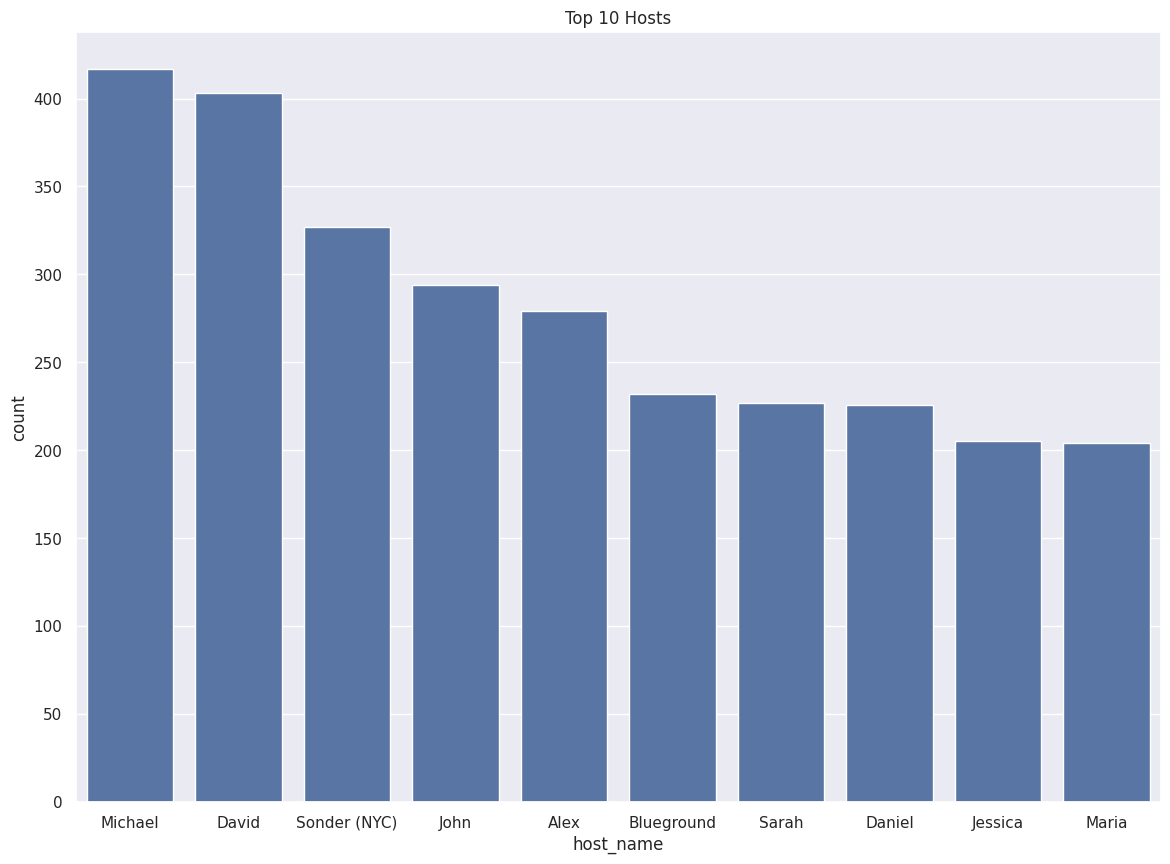

In [48]:
sns.set(rc={'figure.figsize':(14,10)})
sns.barplot(x='host_name', y='count', data=top_10_hots)
plt.title('Top 10 Hosts')
plt.show()

# **Unique Neighbourhoods List**

In [ ]:
list(data['neighbourhood'].unique())

# **Top 10 Neighbourhoods by Listing Count**

In [50]:
df1 = data.groupby(['neighbourhood'])['host_id'].count().nlargest(10).reset_index()
df1

,neighbourhood,host_id
0,Williamsburg,3919
1,Bedford-Stuyvesant,3710
2,Harlem,2658
3,Bushwick,2462
4,Upper West Side,1971
5,Hell's Kitchen,1958
6,East Village,1853
7,Upper East Side,1798
8,Crown Heights,1564
9,Midtown,1545


# **Bar Plot for Top Neighbourhoods**

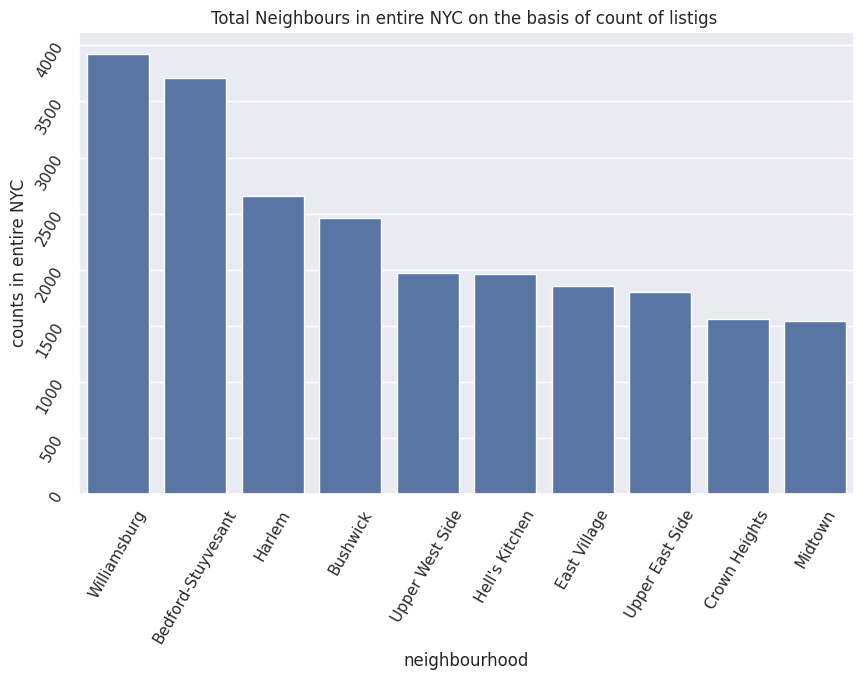

In [51]:
sns.set(rc={'figure.figsize':(10,6)})
sns.barplot(x='neighbourhood', y='host_id', data=df1)

#sns.countplot(data=renting_purpose, x='neighbourhood_group')

title= 'Total Neighbours in entire NYC on the basis of count of listigs '
plt.title(title)
plt.xlabel('neighbourhood')
plt.ylabel('counts in entire NYC')
plt.xticks(rotation=60)
plt.yticks(rotation=60)
plt.show()


# **Room Type Distribution by Neighbourhood Group**

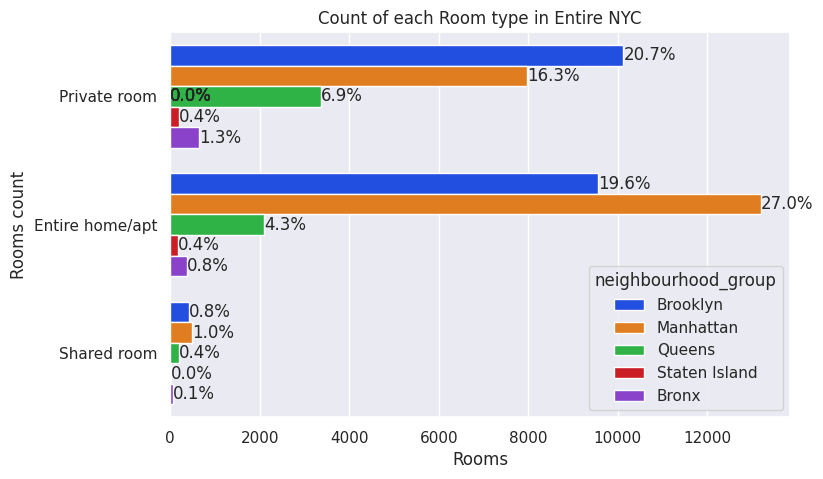

In [57]:
plt.rcParams['figure.figsize']=(8, 5)
ax = sns.countplot(y='room_type' , hue='neighbourhood_group', data=data , palette='bright')

total = len(data['room_type'])
for p in ax.patches:
  percentage = '{:.1f}%'.format(100 * p.get_width() / total)
  x = p.get_x() + p.get_width() + 0.02
  y = p.get_y() + p.get_height() / 2
  ax.annotate(percentage, (x, y), ha='left', va='center')

plt.title ( "Count of each Room type in Entire NYC")
plt.xlabel("Rooms")
plt.ylabel("Rooms count")
plt.show()

# **Max Reviews per Neighbourhood Group**

In [76]:
area_reviews = data.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index().sort_values(by = 'number_of_reviews' , ascending =False)
area_reviews

,neighbourhood_group,number_of_reviews
3,Queens,629
2,Manhattan,607
1,Brooklyn,488
4,Staten Island,333
0,Bronx,321


# **Pie Chart of Reviews per Neighbourhood Group**

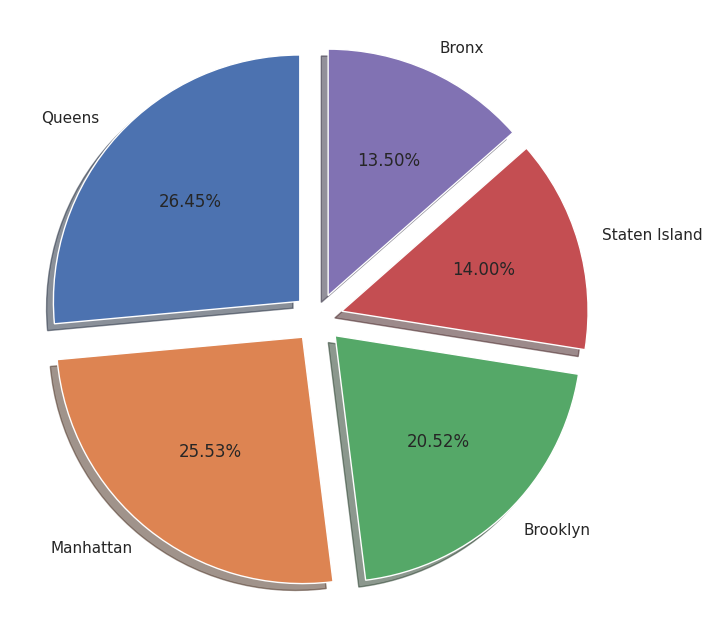

In [74]:
plt.rcParams['figure.figsize']=(13,8)
reviews =  area_reviews['number_of_reviews']
plt.pie(
    reviews ,
    labels = area_reviews['neighbourhood_group'],
    autopct = '%0.2f%%' ,
    startangle =90,
    explode = [0.1 , 0.1, 0.1, 0.1, 0.1],
    shadow = True
    )
plt.title = 'Number of reviews in each neighbourhood_group ', {'fontsize':15}
plt.show()

# **Numeric Features Correlation Heatmap**

TypeError: 'tuple' object is not callable

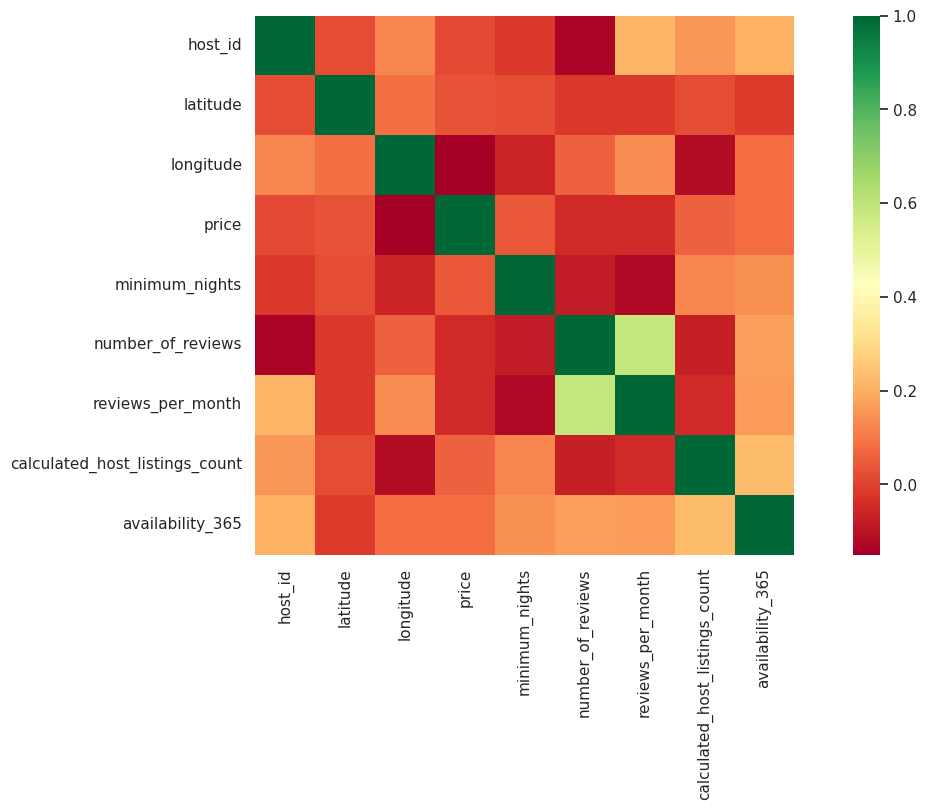

In [83]:
numeric_data= data.select_dtypes(exclude=object)
plt.rcParams['figure.figsize']= (15,7)

sns.heatmap(numeric_data.corr(), square = True, cmap ='RdYlGn')
plt.title( "Co-relation matrix of numerical variables")
plt.show()

# **Scatter Plot: Neighbourhood Group Location**


TypeError: 'tuple' object is not callable

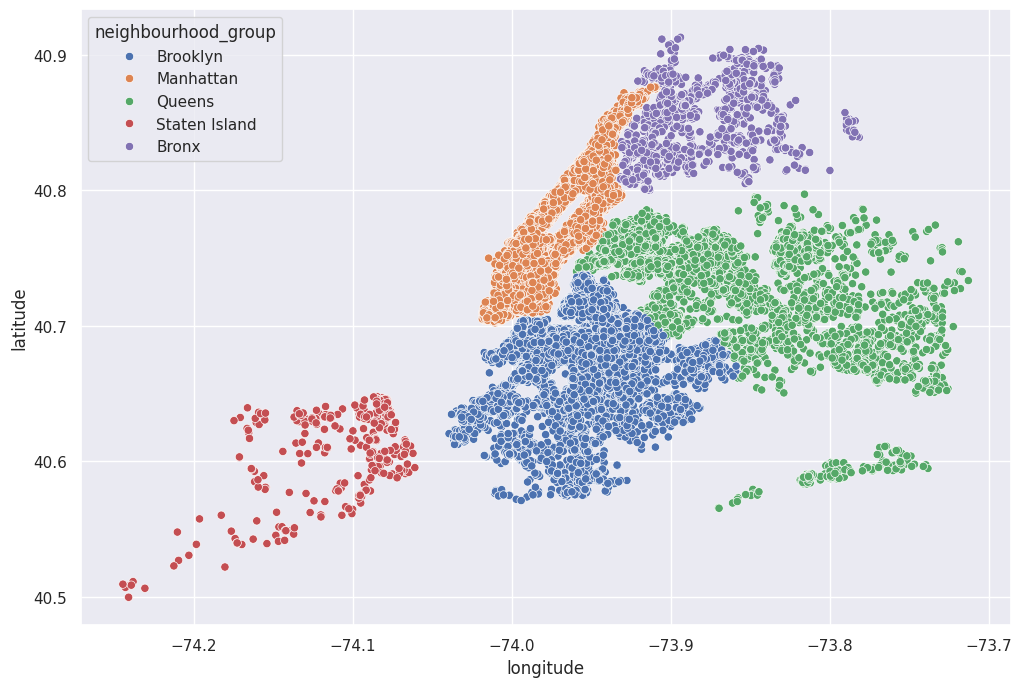

In [89]:

plt.rcParams['figure.figsize'] =(12, 8)


sns.scatterplot(data=data , x='longitude' , y='latitude' , hue='neighbourhood_group')
title='Neighourhood Group Location'
plt.title(title)
plt.show()

# **Scatter Plot: Room Type per Neighbourhood Group**

TypeError: 'tuple' object is not callable

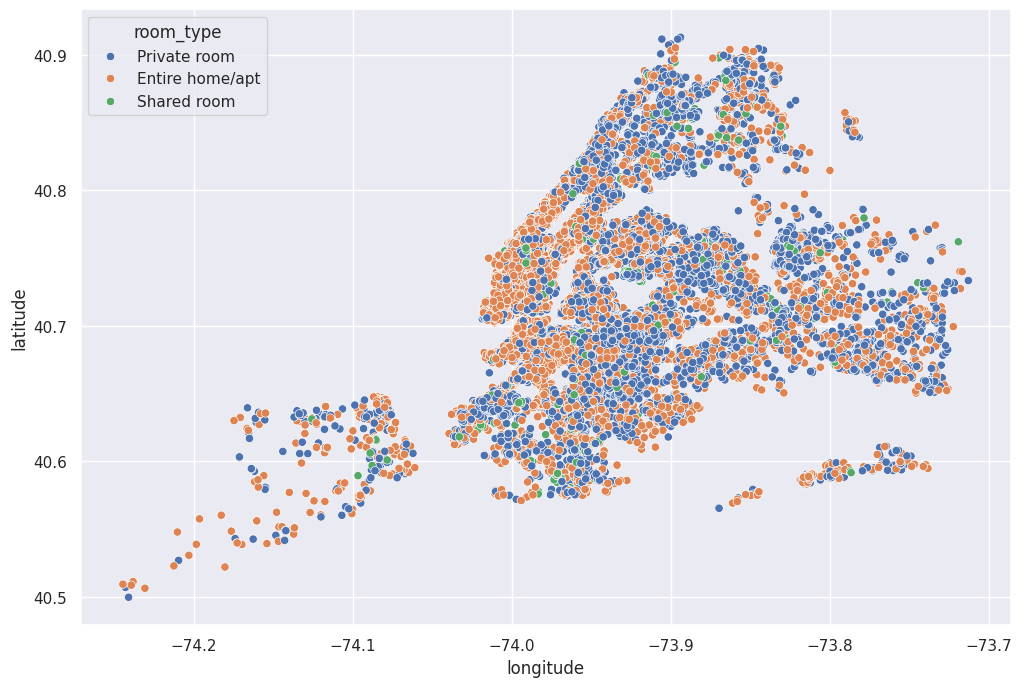

In [93]:
plt.rcParams['figure.figsize'] =(12, 8)

sns.scatterplot(data=data , x='longitude' , y='latitude' , hue='room_type')
title='Room type per Neighbourhood Group'
plt.title(title)
plt.show()

# **Boxplots: Price per Room Type (<$175 and >$175)**

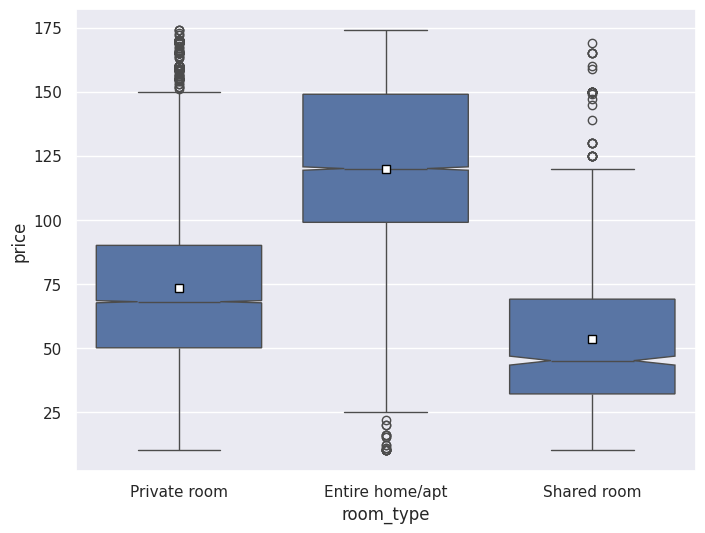

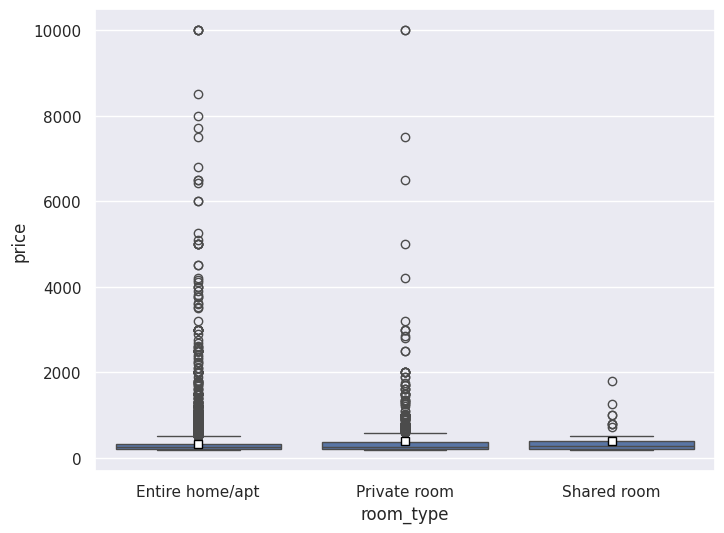

In [98]:
title =['Price per Room Type for properties under $175']
data_filtered = data.loc[data['price'] <175]
f , ax =plt.subplots(figsize=(8 ,6))
sns.boxplot(x='room_type',
            y='price',
            data= data_filtered,
            notch=True,
            showmeans=True,
            meanprops={"marker":"s", "markerfacecolor":"white", "markeredgecolor":"black"})
plt.show()

title =['Price per Room Type for properties more than  $175']
data_filtered = data.loc[data['price'] > 175]
f , ax =plt.subplots(figsize=(8 ,6))
sns.boxplot(x='room_type',
            y='price',
            data= data_filtered,
            notch=False,
            showmeans=True,
            meanprops={"marker":"s", "markerfacecolor":"white", "markeredgecolor":"black"})

plt.show()


# **Scatter Plot: Price vs Reviews per Month (<$175)**

TypeError: 'tuple' object is not callable

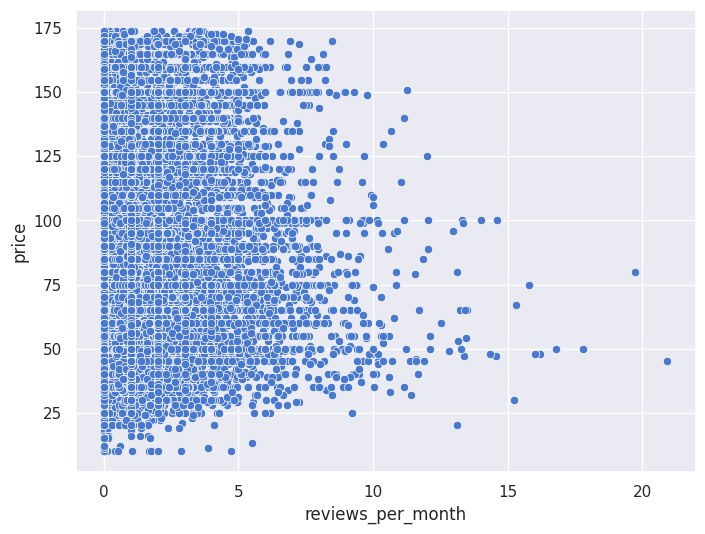

In [111]:
sns.set_palette("muted")
x='reviews_per_month'
y='price'

title=['Price Realtion to the Number of Review per month per Properties under $175']
data_filtered=data.loc[(data['price'] < 175 ) & (data['reviews_per_month'] < 30)]
f, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x=x, y=y , data= data_filtered)
plt.title(title)
plt.show()



# **Scatter Plot: Price vs Reviews per Month (>$175)**

TypeError: 'tuple' object is not callable

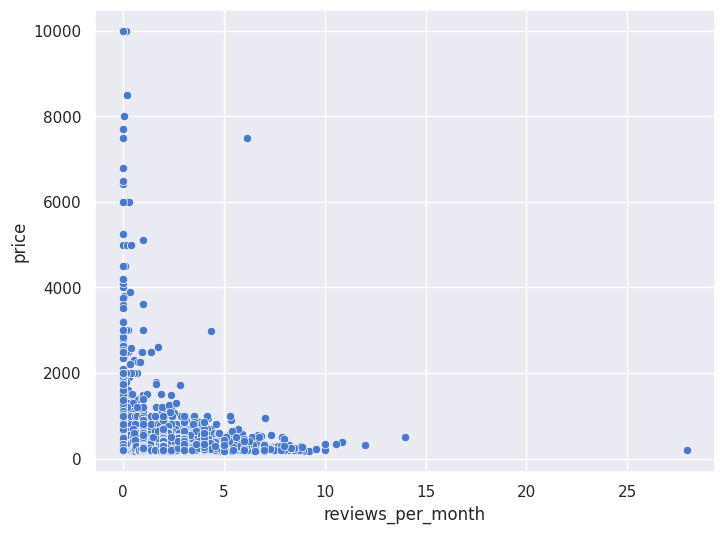

In [112]:
title=['Price Realtion to the Number of Review per month per Properties more than  $175']
data_filtered=data.loc[(data['price'] > 175 )]
f, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x=x, y=y , data= data_filtered)
plt.title(title)
plt.show()

# **Busiest Hosts by Reviews**

In [117]:
busiest_hosts =data.groupby(['host_name', 'room_type','neighbourhood_group'])['number_of_reviews'].max().reset_index()
busiest_hosts = busiest_hosts.sort_values(by='number_of_reviews', ascending= False).reset_index().head(10)
busiest_hosts

,index,host_name,room_type,neighbourhood_group,number_of_reviews
0,4597,Dona,Private room,Queens,629
1,8444,Jj,Private room,Manhattan,607
2,12043,Maya,Private room,Queens,543
3,2868,Carol,Private room,Manhattan,540
4,3987,Danielle,Private room,Queens,510
5,1637,Asa,Entire home/apt,Brooklyn,488
6,18270,Wanda,Private room,Brooklyn,480
7,10577,Linda,Private room,Queens,474
8,3934,Dani,Entire home/apt,Brooklyn,467
9,1179,Angela,Private room,Queens,466


# **Bar Plot: Busiest Hosts by Reviews**


<function matplotlib.pyplot.show(close=None, block=None)>

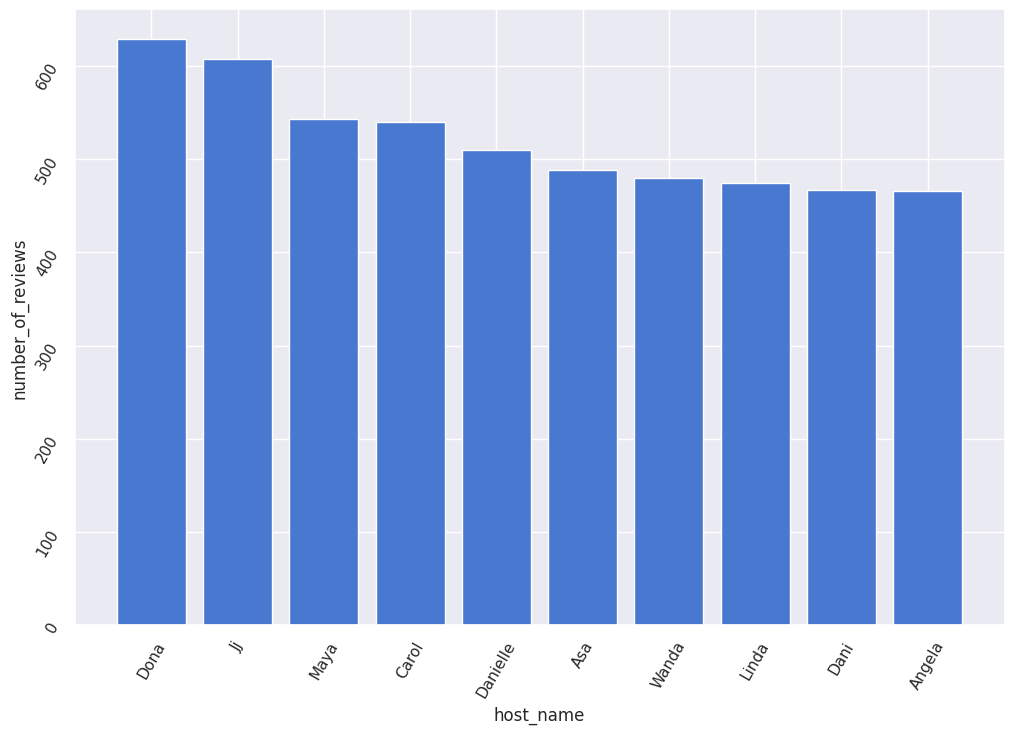

In [121]:
host_name = busiest_hosts['host_name']
reviews = busiest_hosts['number_of_reviews']
plt.xlabel('host_name')
plt.ylabel('number_of_reviews')
plt.bar(host_name, reviews)
plt.xticks(rotation=60)
plt.yticks(rotation=60)
plt.show

# **Top 10 Reviews by Neighbourhood and Room Type**

In [128]:
df_2 =data.groupby(['neighbourhood_group','neighbourhood', 'room_type'])['number_of_reviews'].max().reset_index()
df_2 = df_2.sort_values(by='number_of_reviews', ascending= False).reset_index().head(10)
busiest_hosts

,index,neighbourhood_group,neighbourhood,room_type,number_of_reviews
0,398,Queens,Jamaica,Private room,629
1,273,Manhattan,Harlem,Private room,607
2,369,Queens,East Elmhurst,Private room,543
3,288,Manhattan,Lower East Side,Private room,540
4,214,Brooklyn,Park Slope,Entire home/apt,488
5,146,Brooklyn,Bushwick,Private room,480
6,379,Queens,Flushing,Private room,474
7,230,Brooklyn,South Slope,Entire home/apt,467
8,399,Queens,Jamaica,Shared room,454
9,259,Manhattan,East Village,Private room,451


# **Top 5 Most Expensive Listings**:

In [125]:
data.nlargest(5, 'price')[['name','neighbourhood_group','neighbourhood', 'room_type','price' ]][:10]


,name,neighbourhood_group,neighbourhood,room_type,price
9151,Furnished room in Astoria apartment,Queens,Astoria,Private room,10000
17692,Luxury 1 bedroom apt. -stunning Manhattan views,Brooklyn,Greenpoint,Entire home/apt,10000
29238,1-BR Lincoln Center,Manhattan,Upper West Side,Entire home/apt,10000
6530,Spanish Harlem Apt,Manhattan,East Harlem,Entire home/apt,9999
12342,"Quiet, Clean, Lit @ LES & Chinatown",Manhattan,Lower East Side,Private room,9999


# **Top 10 Cheapest Listings**

In [127]:
data.sort_values(by='price',ascending= True)[['name','neighbourhood_group','neighbourhood', 'host_name','room_type','price' ]][:10]

,name,neighbourhood_group,neighbourhood,host_name,room_type,price
22835,IT'S SIMPLY CONVENIENT!,Queens,Jamaica,Maria,Entire home/apt,10
47218,Beautiful room in Bushwick,Brooklyn,Bushwick,Julio,Private room,10
34446,Bronx Apart,Bronx,Highbridge,Luz,Private room,10
23256,"Quiet, Cozy UES Studio Near the Subway",Manhattan,Upper East Side,Amy,Entire home/apt,10
32810,Gigantic Sunny Room in Park Slope-Private Back...,Brooklyn,Sunset Park,Rachel,Entire home/apt,10
35601,"Charming, bright and brand new Bed-Stuy home",Brooklyn,Bedford-Stuyvesant,Caterina,Entire home/apt,10
31407,Cozy feel at home studio,Manhattan,Kips Bay,Maureen,Private room,10
31066,"Very Spacious bedroom, steps from CENTRAL PARK.",Manhattan,Upper West Side,Salim,Private room,10
33505,Room with a view,Brooklyn,Williamsburg,Martin,Private room,10
22287,Jen Apt,Manhattan,SoHo,Jennifer,Private room,10


# **Top Neighbourhood per Group by Average Price**

In [136]:
df_3 =data.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index()
top_neigh_each = df_3.loc[df_3.groupby('neighbourhood_group')['price'].idxmax()].sort_values(by='price', ascending= False)
top_neigh_each

,neighbourhood_group,neighbourhood,price
188,Staten Island,Fort Wadsworth,800.000000
121,Manhattan,Tribeca,490.638418
88,Brooklyn,Sea Gate,487.857143
34,Bronx,Riverdale,442.090909
163,Queens,Neponsit,274.666667


# **Bar Plot: Top Neighbourhood in Each Group**


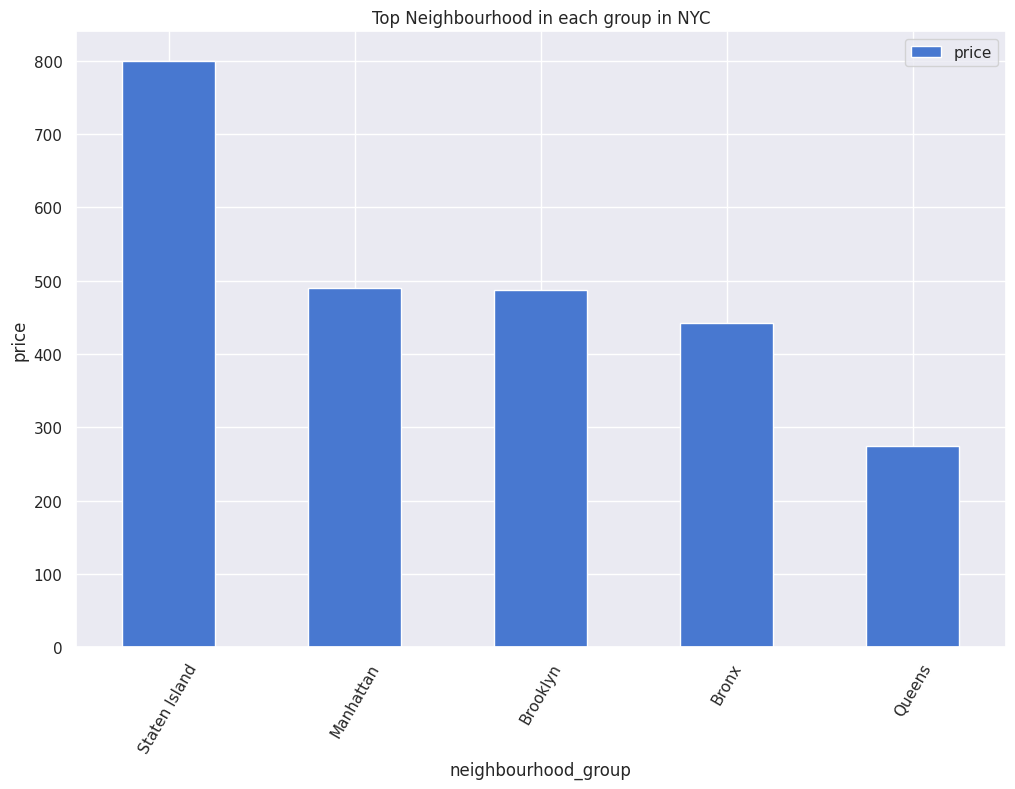

In [138]:
top_neigh_each.plot.bar(x='neighbourhood_group', rot=60, title='Top Neighbourhood in each group in NYC')
plt.xlabel('neighbourhood_group')
plt.ylabel('price')
plt.show()

# **Final `neighbourhood_group` Value Counts**


In [139]:
data.neighbourhood_group.value_counts()

,count
neighbourhood_group,
Manhattan,21660
Brooklyn,20095
Queens,5666
Bronx,1090
Staten Island,373


# Final room_type Value **Counts**

In [70]:
data['room_type'].value_counts()

,count
room_type,
Entire home/apt,25409
Private room,22326
Shared room,1160


---

# 🙏 **Thank You**
Thank you for exploring this project! Your feedback and suggestions are always welcome.
